In [1]:
#================== This will take a lot of work to make this notebook great, saurabh@utexas.edu ==================#

"""
    Author: Suman Saurabh (UT Austin)
    
    Notes: List of helper functions- 
        file_path_func - to get the file path
        file_read_func - to read the file and display it
        split_channels_func -
        crop_select_func -
        crop_image_func -
        hist_image_func - 
"""

#==================================================================================================================#

# import of these packages are required for the package to work

import os            # for getting file path and other functions
import cv2           # for image manipulations
import matplotlib.pyplot as plt




# helper functions 

# 1.file_path_func
    
#     Purpose: This function will be used to always get the right file path for importing image
#              pasted in the working directory.
#     How is it done: The function uses os module in python to get the current working directory by
#              os.getcwd(). Next, the package uses os.path.join to join the path for file from os.getcwd 
#              and fname provided for the profile. The function return a string which is the complete file 
#              path.

#------------------------------------------------------------------------------------------------------------------

# Simple functions

    # cv2.imwrite("name with new extension", image_file)
    # image_file.shape to geth the shape of the image file that has been read using imread.

def file_path_func(fname):
    """
    Purpose: This function will be used to always get the right file path for importing image
             pasted in the working directory.
    How is it done: The function uses os module in python to get the current working directory by
             os.getcwd(). Next, the package uses os.path.join to join the path for file from os.getcwd 
             and fname provided for the profile. 
    Returns: The function return a string which is the complete file path.
    """
    curr_wd = os.getcwd()
    file_path = os.path.join(curr_wd, fname)
    return file_path

# 2.file_read_func
    
#     Purpose: This function will be used to read and display the image from the working directory.
#     How is it done: The function uses cv2.imread to read the image from the current working directory  
#              and cv2.cvtColor (fname, mode) is used to convert the BGR read by cv2 to RGB or other modes.

def file_read_func(f_path, disp_tupple, mode):
    """
     Purpose: This function will be used to read and display the image from the working directory.
     How is it done: The function uses cv2.imread to read the image from the current working directory  
              and cv2.cvtColor (fname, mode) is used to convert the BGR read by cv2 to RGB or other modes.
              The function uses disp_tupple to select the size of displayed image from matplotlib package.
              Next, the package uses the if statements to read the modes of image being read, refere below:
              
              mode:        code:
              rgb          cv2.COLOR_BGR2RGB
              grayscale    cv2.COLOR_BGR2GRAYSCALE
    Returns: image array
    """
    image = cv2.imread(f_path)
    if mode == "rgb":
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=disp_tupple)
        plt.imshow(image)
        plt.show()
    elif mode == "grayscale":
        image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.figure(figsize=disp_tupple)
        plt.imshow(image, cmap="gray")
        plt.show()
    return image


# 3. Split image to color channels
#     Purpose: This function will be used to read a color image and split it into RBG channels.
#     How is it done: The function uses indexing of image read as a numpy array to split the three channels.

def split_channels_func(image, disp_tupple):
    """
    3. Split image to color channels
    Purpose: This function will be used to read a color image and split it into RBG channels.
    How is it done: The function uses indexing of image read as a numpy array to split the three channels.
    """
    red_channel, gree_channel, blue_channel = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    plt.figure(figsize=disp_tupple)
    plt.subplot(131)
    plt.title("Red Channel")
    plt.imshow(red_channel, cmap = "gray")
    plt.subplot(132)
    plt.title("Green Channel")
    plt.imshow(gree_channel, cmap = "gray")
    plt.subplot(133)
    plt.title("Blue Channel")
    plt.imshow(blue_channel, cmap = "gray")
    plt.show()
        
    return red_channel, gree_channel, blue_channel

# 4.Crop image to rectangular shapes
#     Purpose: This function will be used to select and mark an area to crop from an image.
#     How is it done: The function uses cv2.rectangle to create the rectangle for selecting a cropping area and
#                     then uses the function crop_image_func to crop that area by numpy slicing.

def crop_select_func(image,top_left_tupple, bottom_right_tupple,color,line_width):
    """
     Purpose: This function will be used to select and mark an area to crop from an image.
     How is it done: The function uses cv2.rectangle to create the rectangle
    """
    image = cv2.rectangle(image,top_left_tupple,bottom_right_tupple,color, line_width)
    
    plt.imshow(image)
           
    return image

def crop_image_func(image,top_left_tupple, bottom_right_tupple):
    val = input("Do you want to crop the area?: Y/N")
    if val == "Y":
        image = image[top_left_tupple[0]:bottom_right_tupple[0],top_left_tupple[1]:bottom_right_tupple[1]]
    elif val == "N":
        image = image
    plt.imshow(image)
    return image

#5. Histogram function
#         Purpose: To create and display histogram for color and gray images. Note: Still based on error handling
#                  of index error on image shape.
#         How is it done: It uses the function cv.calcHist to obtain the Histogram for the image.

def hist_image_func(image,bins,intensity_range):
    try:
        mode = image.shape[2]
        color = ("red", "blue", "green")
        print("Mode is:", mode)
        if mode == 3:
            print("This checks out!")
            for i, color in enumerate(color):
                hist= cv2.calcHist([image],[i],None,[bins],intensity_range)
                plt.plot(hist,color = color,label = color+" channel")
                plt.xlim(intensity_range)
            plt.legend()
            plt.title("Histogram Channels")
            plt.show()
    except:
        hist = cv2.calcHist([image],[0],None,[bins],intensity_range)
        plt.plot(hist)
        plt.xlim(intensity_range)
        plt.show() 
        
#6. Plot two grayscale images next to each other
#   Purpose: To display two images next to each other after trasnformations.
#   How is it done: Using subplots in matplotlib.

def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()
    
#7. Contrast and brightness control on image
#   Purpose: Change the contrast and brightness of the image
#   How is it done: uses the function cv2.convertScaleAbs

def contbrig_image_func(image,alpha, beta):
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    plt.imshow(image,cmap = "gray")
    return image

In [2]:
#sanity check for file_path_func
fname = "baboon.png"
f_path = file_path_func(fname)
print(f_path)

/home/suman/Documents/Image package/baboon.png


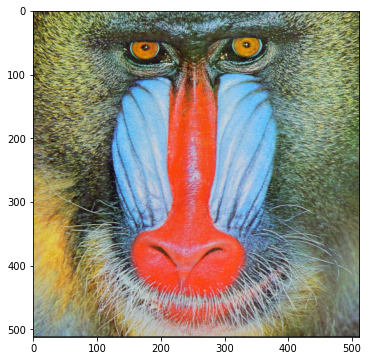

In [3]:
#sanity check for 
image = file_read_func(f_path, (6,6), "rgb")

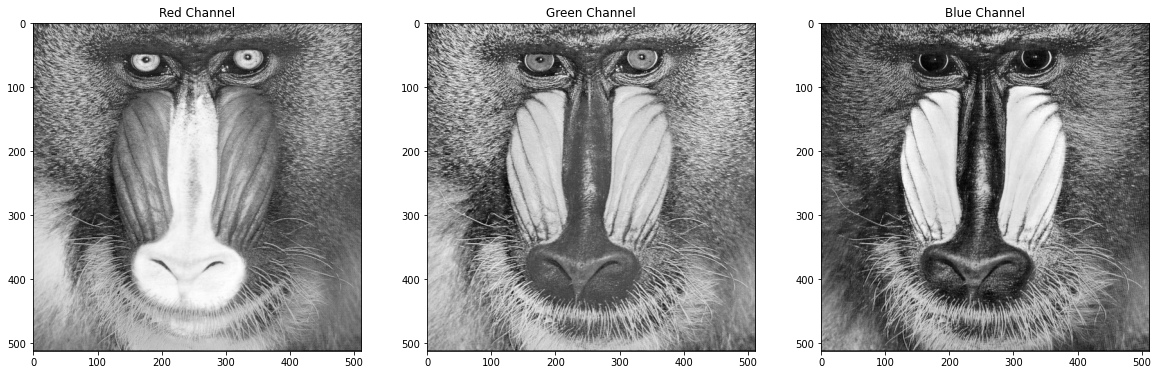

In [4]:
red, green, blue = split_channels_func(image, (20,20))

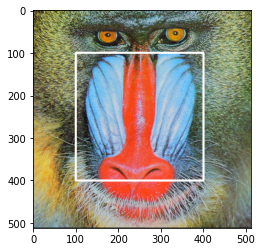

In [5]:
image = crop_select_func(image,(100,100),(400,400),(255,255,255),3)
plt.imshow(image)

Do you want to crop the area?: Y/NY


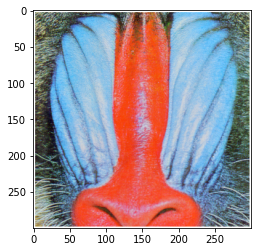

In [6]:
image = crop_image_func(image,(100,100),(400,400))

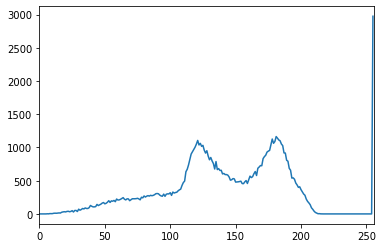

In [7]:
image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hist_image_func(image,256,[0,256])


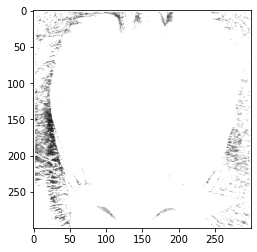

In [8]:
new_image = contbrig_image_func(image, 2, 100)

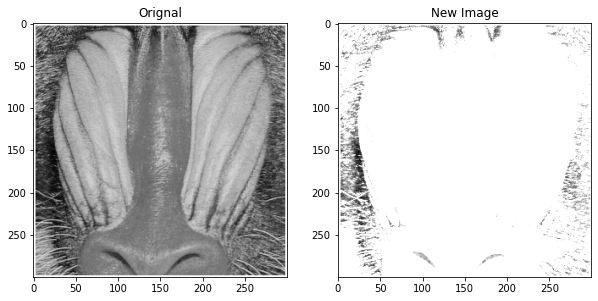

In [9]:
plot_image(image,new_image)

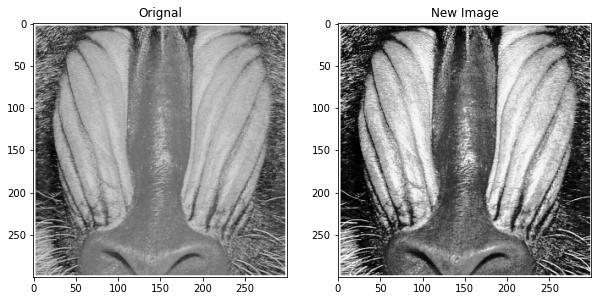

In [10]:
image_eq = cv2.equalizeHist(image)
plot_image(image,image_eq)